## Whale Portfolio

In [20]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

# Portfolio paths

In [21]:
whale_file = Path('whale_returns.csv')
algo_file = Path('algo_returns.csv')
sptsx_file = Path('sp_tsx_history.csv')

## Reading csv files

In [22]:
#read_csv
whaledf = pd.read_csv(whale_file, index_col='Date', infer_datetime_format=True, parse_dates=True)
algodf = pd.read_csv(algo_file, index_col='Date', infer_datetime_format=True, parse_dates=True)
aptsxdf = pd.read_csv(sptsx_file, index_col='Date', infer_datetime_format=True, parse_dates=True)
#infer dates

## Whale Returns

In [23]:
# Reading whale returns
whaledf.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [24]:
# Count nulls
whaledf.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [25]:
# Drop nulls
whaledf = whaledf.dropna()
whaledf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [26]:
whaledf.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

In [27]:
# Reading algorithmic returns
algodf.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [28]:
# Count nulls
algodf.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [29]:
# Drop nulls
algodf = algodf.dropna()
algodf

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [30]:
algodf.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data

In [31]:
# Reading S&P TSX 60 Closing Prices
aptsxdf.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [32]:
# Check Data Types
aptsxdf.dtypes

Close    object
dtype: object

In [33]:
# Fix Data Types
#Removing all objects
aptsxdf['Close'] = aptsxdf['Close'].str.replace('$', '')
aptsxdf['Close'] = aptsxdf['Close'].str.replace(',', '')
aptsxdf['Close'] = aptsxdf['Close'].str.replace(' ', '')
#Turns the column 'Close' values from a object to float
aptsxdf['Close'] = aptsxdf['Close'].astype('float')
aptsxdf.dtypes

C:\Users\Curtis lym\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Close    float64
dtype: object

In [34]:
# Calculate Daily Returns
aptsxdf_dreturns = aptsxdf.pct_change().dropna()
aptsxdf_dreturns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [35]:
# Rename `Close` Column to be specific to this portfolio.
# we can change close to sp&60 with .columns
aptsxdf_dreturns.columns = ['SP&60']
aptsxdf_dreturns.head()

,SP&60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#concatenating allows us to join all the data
joined_data = pd.concat([whaledf, algodf, aptsxdf_dreturns], axis='columns', join='inner')
joined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP&60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

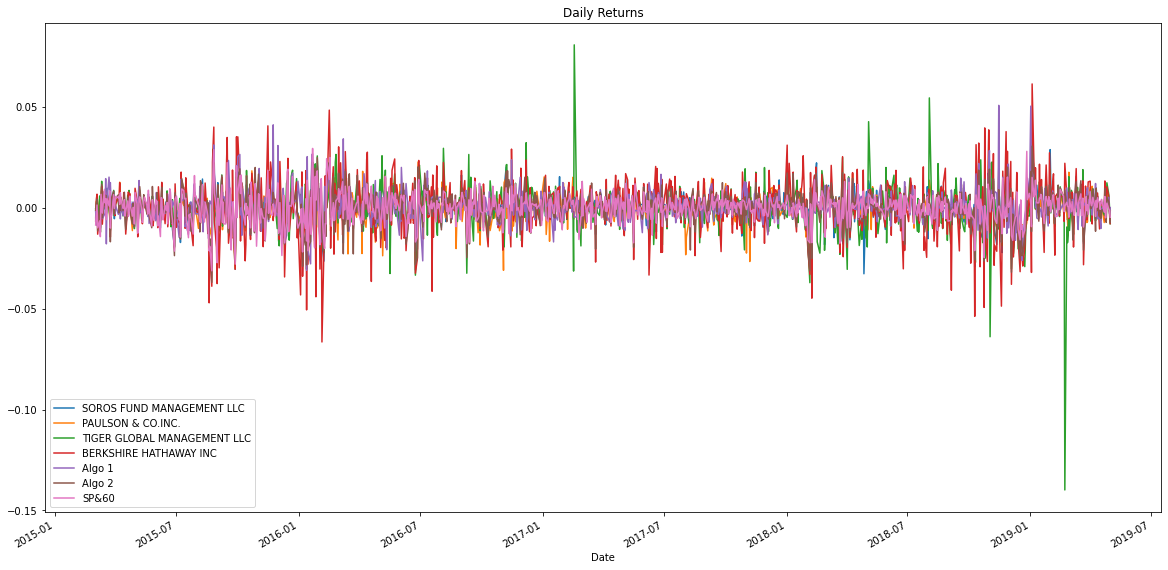

In [37]:
# Plot daily returns of all portfolios
joined_data.plot(figsize=(20, 10), title='Daily Returns')

### Calculate and Plot cumulative returns

In [38]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data).cumprod()
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP&60
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

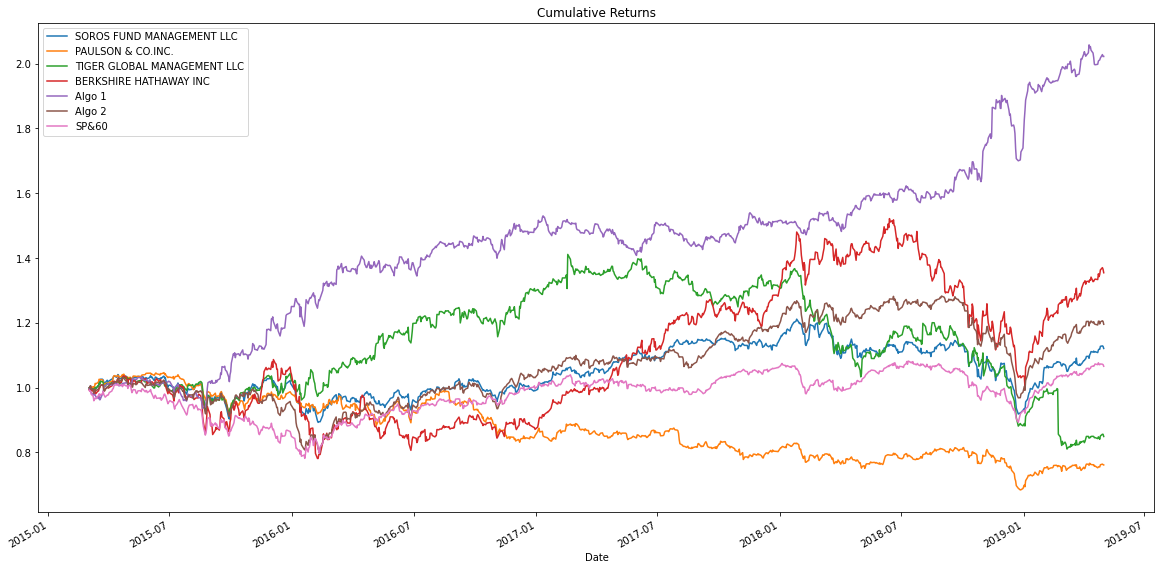

In [39]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title='Cumulative Returns')

# Risk Analysis
## Determine the risk of each portfolio:

## Create a box plot for each portfolio

<AxesSubplot:title={'center':'Risk Analysis'}>

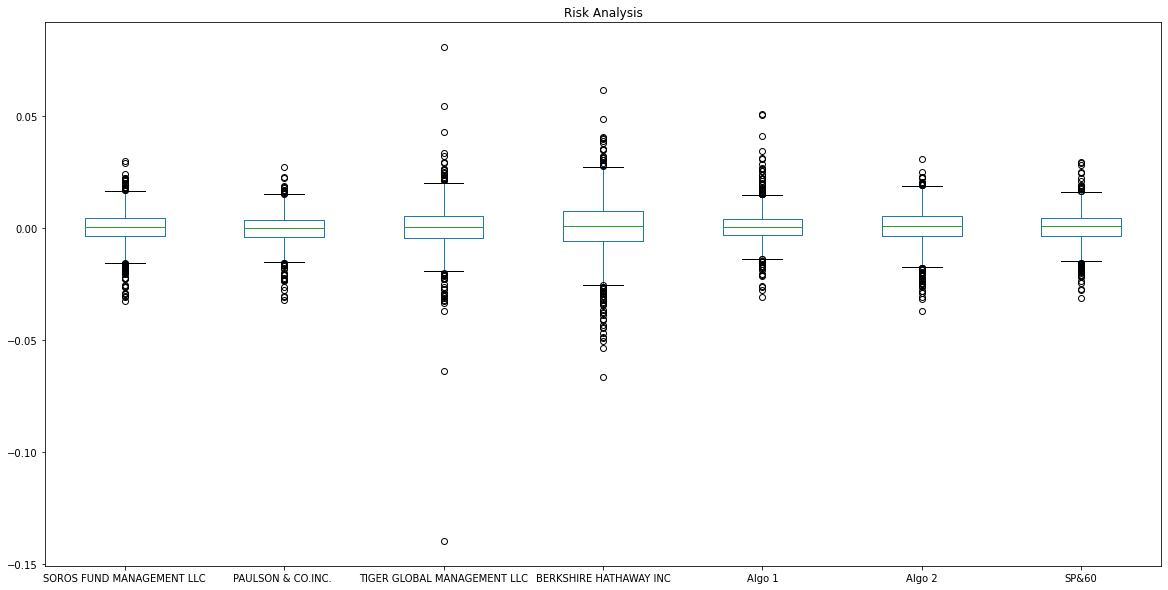

In [40]:
# Box plot to visually show risk
joined_data.plot.box(figsize=(20, 10), title='Risk Analysis')

### Calculate Standard Deviations

In [41]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = joined_data.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP&60                          0.007034
dtype: float64

In [ ]:
By calculating standard deviation we can us the values calculated in order to dertermine stock volatility.

### Determine which portfolios are riskier than the S&P TSX 60

In [42]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_500_std = round(all_portfolio_std['SP&60'], 6)
sp_500_std

0.007034

In [43]:
# Determine which portfolios are riskier than the S&P TSX 60
all_portfolio_std > sp_500_std

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP&60                           True
dtype: bool

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

# Rolling Statistics

## Calculate and plot rolling std for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day STD'}, xlabel='Date'>

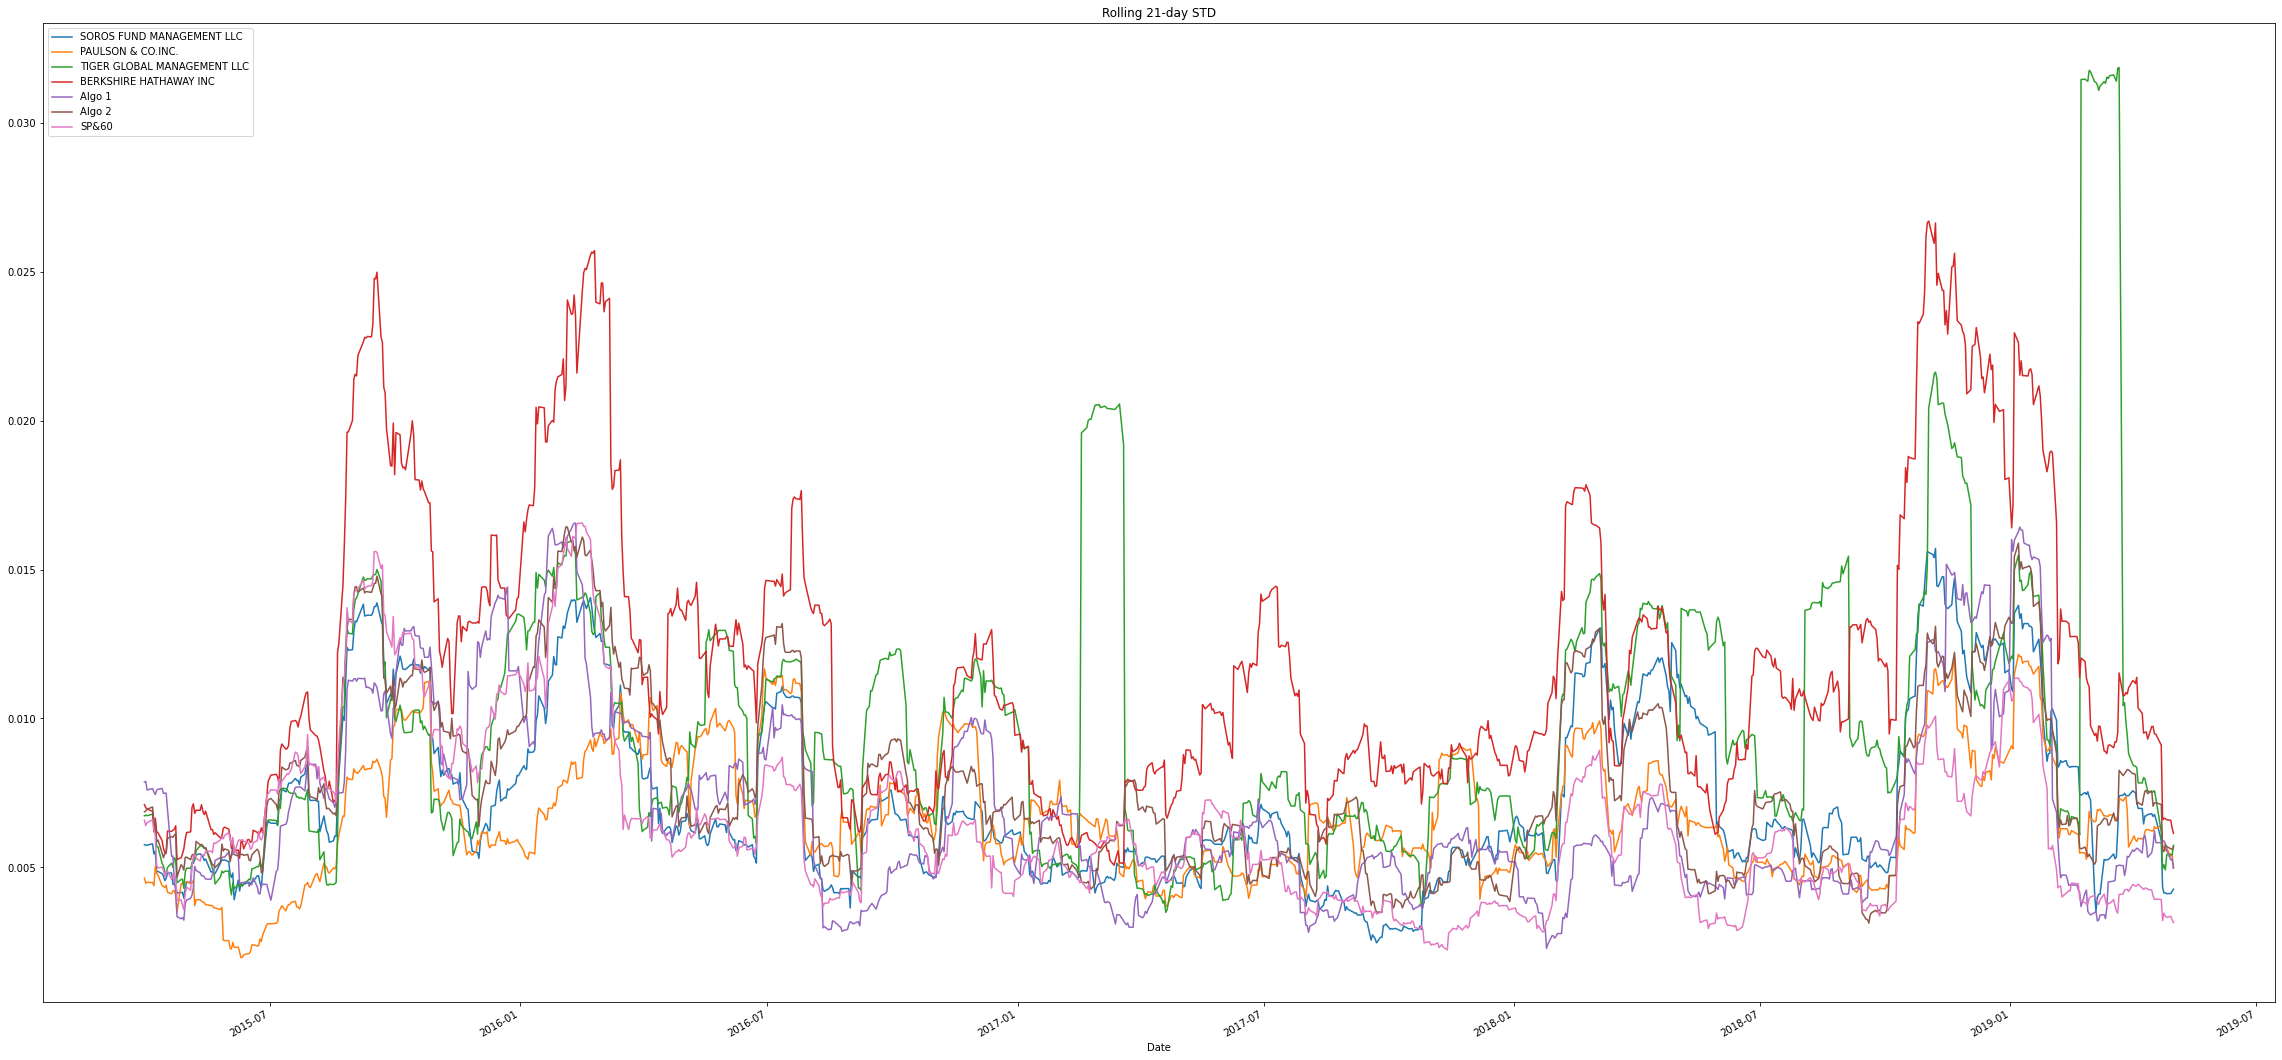

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolios_21day_rolling = joined_data.rolling(window=21).std()
# Plot the rolling standard deviation
portfolios_21day_rolling.plot(figsize=(40, 20), title='Rolling 21-day STD')

## Calculate and plot the correlation

In [46]:
# Calculate the correlation
correlation_portfolios = joined_data.corr()
# Display the correlation matrix
correlation_portfolios.style.background_gradient(cmap="summer")
#by creating a heatmap we can measure which stocks are more correlated than others, also the distinguishing colours help give us a 
#visual indication as well, colours that warmer are higher correlated and colours that are colder are less correlated

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP&60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP&60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


by creating a heatmap we can measure which stocks are more correlated than others, also the distinguishing colours help give us a visual indication as well. Colours that are warmer are higher correlated and colours that are colder are less correlated

## Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

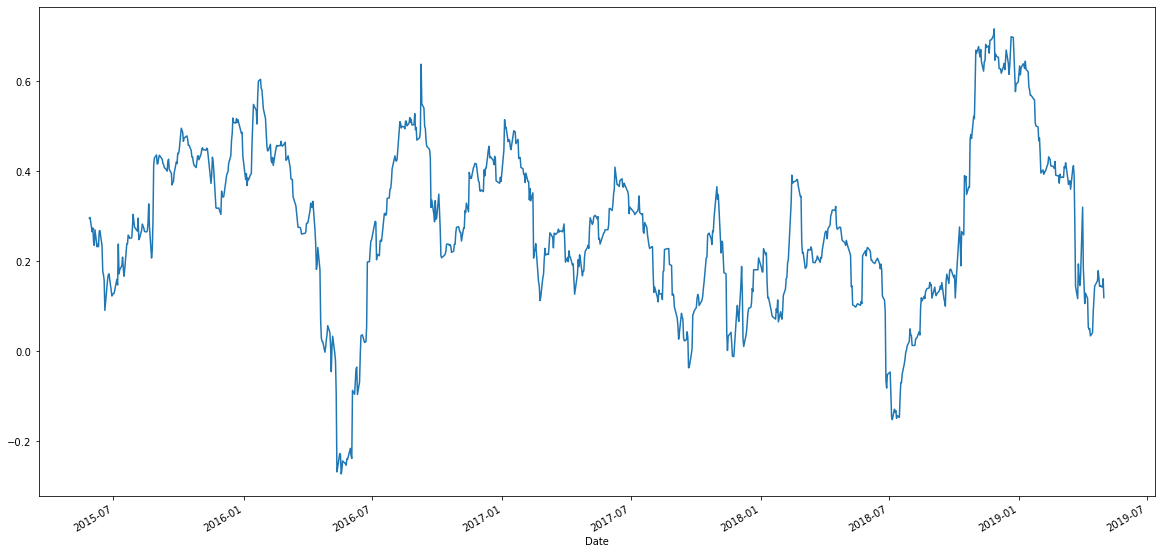

In [47]:
# Calculate covariance of a single portfolio
covariance = joined_data["Algo 1"].rolling(window=60).cov(joined_data["SP&60"])
# Calculate variance of S&P TSX
sp_variance = joined_data["SP&60"].rolling(window=60).var()
# Computing beta
portfolio_beta = covariance / sp_variance
# Plot beta trend
portfolio_beta.plot(figsize=(20, 10))

# Rolling Statistics Challenge: Exponentially Weighted Average
## Use `ewm` to calculate the rolling window

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

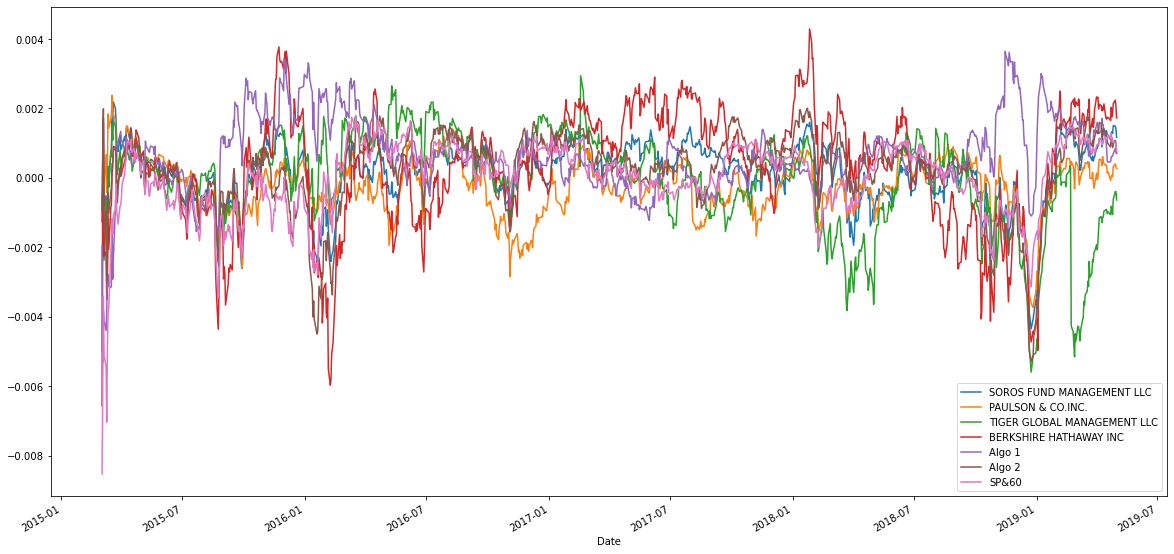

In [48]:
# Use `ewm` to calculate the rolling window
joined_data.ewm(halflife=21).mean().plot(figsize=(20,10))

## Sharpe Ratios

## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data.mean() * 252) / (joined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP&60                          0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

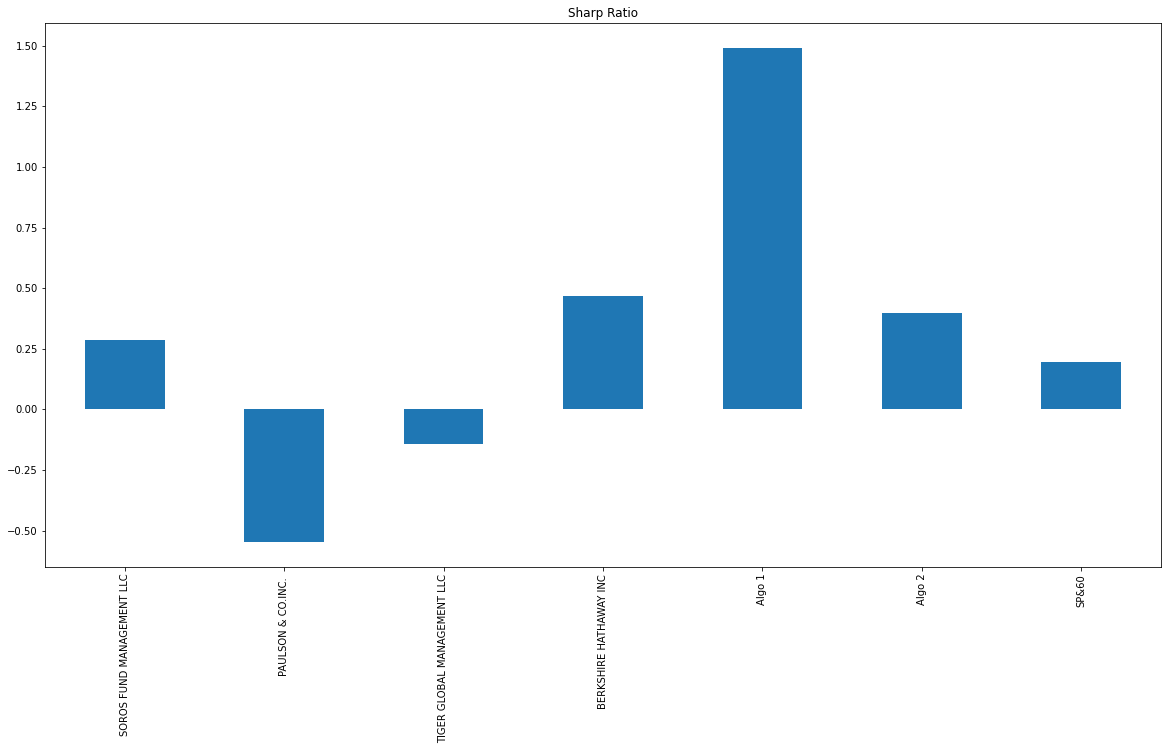

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20, 10), title='Sharp Ratio')

# Question

## Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

# Create Custom Portfolio

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [51]:
# Reading data from 1st stock
tsla_file = Path('TSLA.csv')
tsla_df = pd.read_csv(tsla_file, index_col='Date', infer_datetime_format=True, parse_dates=True)
tsla_df.columns = ['TSLA']
tsla_df.head()

,TSLA
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [52]:
# Reading data from 2nd stock
apple_file = Path('APPLE.csv')
apple_df = pd.read_csv(tsla_file, index_col='Date', infer_datetime_format=True, parse_dates=True)
apple_df.columns = ['APPLE']
apple_df.head()

,APPLE
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [53]:
# Reading data from 3rd stock
bestbuy_file = Path('BESTBUY.csv')
bestbuy_df = pd.read_csv(bestbuy_file, index_col='Date', infer_datetime_format=True, parse_dates=True)
bestbuy_df.columns = ['BEST_BUY']
bestbuy_df.head()

,BEST_BUY
Date,
2018-01-02,69.16
2018-01-03,68.40
2018-01-04,67.28
2018-01-05,68.87
2018-01-08,69.69


In [54]:
# Combine all stocks in a single DataFrame
all_3_portfolios = pd.concat([tsla_df, apple_df, bestbuy_df], axis='columns', join='inner')

In [55]:
# Reorganize portfolio data by having a column per symbol
all_3_portfolios.head()

,TSLA,APPLE,BEST_BUY
Date,,,
2018-01-02,64.11,64.11,69.16
2018-01-03,63.45,63.45,68.40
2018-01-04,62.92,62.92,67.28
2018-01-05,63.32,63.32,68.87
2018-01-08,67.28,67.28,69.69


In [56]:
# Calculate daily returns
# Drop NAs
all_3_portfolio_returns = all_3_portfolios.pct_change().dropna()
# Display sample data
all_3_portfolio_returns

,TSLA,APPLE,BEST_BUY
Date,,,
2018-01-03,-0.010295,-0.010295,-0.010989
2018-01-04,-0.008353,-0.008353,-0.016374
2018-01-05,0.006357,0.006357,0.023633
2018-01-08,0.062539,0.062539,0.011906
2018-01-09,-0.008026,-0.008026,0.001291
...,...,...,...
2019-12-20,0.003836,0.003836,-0.010266
2019-12-23,0.033531,0.033531,-0.001026
2019-12-24,0.014432,0.014432,0.003309


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weight_all_portfolio_return = all_3_portfolio_returns.dot(weights)
# Display sample data
weight_all_portfolio_return

Date
2018-01-03   -0.010526
2018-01-04   -0.011027
2018-01-05    0.012116
2018-01-08    0.045662
2018-01-09   -0.004920
                ...   
2019-12-20   -0.000865
2019-12-23    0.022012
2019-12-24    0.010724
2019-12-26    0.008633
2019-12-27   -0.004038
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_data = pd.concat([joined_data, all_3_portfolio_returns], axis='columns', join='inner')
all_combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP&60,TSLA,APPLE,BEST_BUY
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.010295,-0.010295,-0.010989
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.008353,-0.008353,-0.016374
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.006357,0.006357,0.023633
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.062539,0.062539,0.011906
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.008026,-0.008026,0.001291


# Re-run the risk analysis with your portfolio to see how it compares to the others

## Calculate the Annualized Standard Deviation

In [60]:
# Calculate the annualized `std`
all_combined_data_std = all_combined_data.std()
all_annualized_std = all_combined_data_std * np.sqrt(252)
all_annualized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP&60                          0.099121
TSLA                           0.557860
APPLE                          0.557860
BEST_BUY                       0.325873
dtype: float64

## Calculate and plot rolling std with 21-day window

<AxesSubplot:title={'center':'21-day'}, xlabel='Date'>

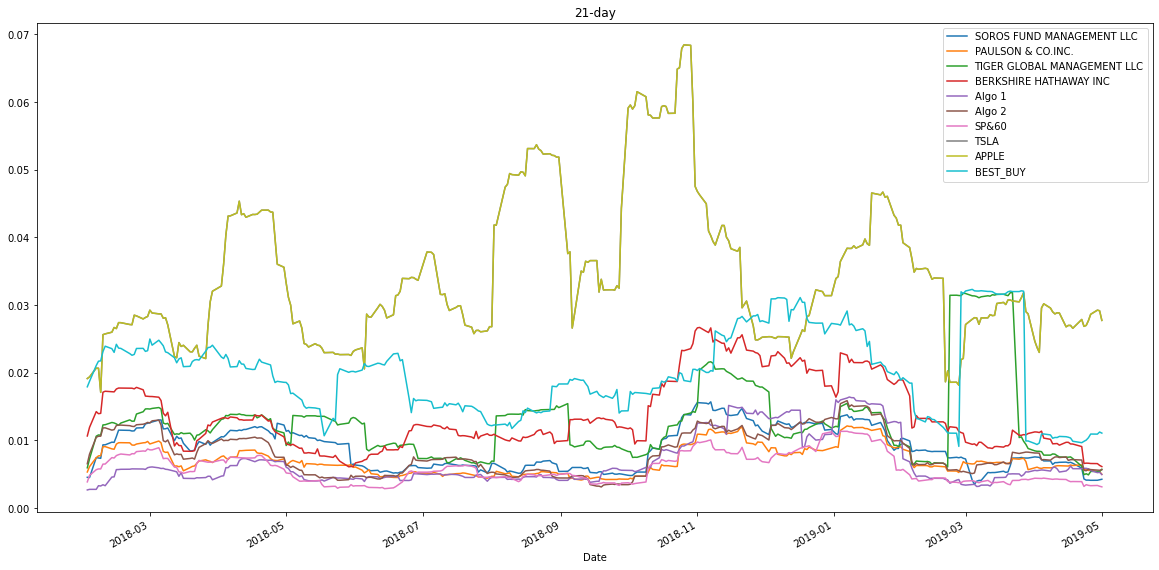

In [61]:
# Calculate rolling standard deviation
all_portfolios_21day_rolling = all_combined_data.rolling(window=21).std()
# Plot rolling standard deviation
all_portfolios_21day_rolling.plot(figsize=(20, 10), title='21-day')

## Calculate and plot the correlation

In [67]:
# Calculate and plot the correlation
correlation_all_ports = all_portfolios_21day_rolling.corr()
correlation_all_ports

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP&60,TSLA,APPLE,BEST_BUY
SOROS FUND MANAGEMENT LLC,1.000000,0.858454,0.155750,0.779226,0.708836,0.821065,0.828579,0.126464,0.126464,0.395021
PAULSON & CO.INC.,0.858454,1.000000,0.333258,0.793912,0.772288,0.900811,0.831807,0.064940,0.064940,0.540116
TIGER GLOBAL MANAGEMENT LLC,0.155750,0.333258,1.000000,0.153765,0.103534,0.139108,0.100913,-0.039500,-0.039500,0.574658
BERKSHIRE HATHAWAY INC,0.779226,0.793912,0.153765,1.000000,0.834817,0.813882,0.838244,0.286083,0.286083,0.433247
Algo 1,0.708836,0.772288,0.103534,0.834817,1.000000,0.755169,0.774921,0.209915,0.209915,0.418740
Algo 2,0.821065,0.900811,0.139108,0.813882,0.755169,1.000000,0.932574,0.065137,0.065137,0.509346
SP&60,0.828579,0.831807,0.100913,0.838244,0.774921,0.932574,1.000000,0.226097,0.226097,0.445696
TSLA,0.126464,0.064940,-0.039500,0.286083,0.209915,0.065137,0.226097,1.000000,1.000000,-0.128189
APPLE,0.126464,0.064940,-0.039500,0.286083,0.209915,0.065137,0.226097,1.000000,1.000000,-0.128189
BEST_BUY,0.395021,0.540116,0.574658,0.433247,0.418740,0.509346,0.445696,-0.128189,-0.128189,1.000000


In [68]:
correlation_all_ports.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP&60,TSLA,APPLE,BEST_BUY
SOROS FUND MANAGEMENT LLC,1.000000,0.858454,0.155750,0.779226,0.708836,0.821065,0.828579,0.126464,0.126464,0.395021
PAULSON & CO.INC.,0.858454,1.000000,0.333258,0.793912,0.772288,0.900811,0.831807,0.064940,0.064940,0.540116
TIGER GLOBAL MANAGEMENT LLC,0.155750,0.333258,1.000000,0.153765,0.103534,0.139108,0.100913,-0.039500,-0.039500,0.574658
BERKSHIRE HATHAWAY INC,0.779226,0.793912,0.153765,1.000000,0.834817,0.813882,0.838244,0.286083,0.286083,0.433247
Algo 1,0.708836,0.772288,0.103534,0.834817,1.000000,0.755169,0.774921,0.209915,0.209915,0.418740
Algo 2,0.821065,0.900811,0.139108,0.813882,0.755169,1.000000,0.932574,0.065137,0.065137,0.509346
SP&60,0.828579,0.831807,0.100913,0.838244,0.774921,0.932574,1.000000,0.226097,0.226097,0.445696
TSLA,0.126464,0.064940,-0.039500,0.286083,0.209915,0.065137,0.226097,1.000000,1.000000,-0.128189
APPLE,0.126464,0.064940,-0.039500,0.286083,0.209915,0.065137,0.226097,1.000000,1.000000,-0.128189
BEST_BUY,0.395021,0.540116,0.574658,0.433247,0.418740,0.509346,0.445696,-0.128189,-0.128189,1.000000


## Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'APPLE vs S&P 60 TSX'}, xlabel='Date'>

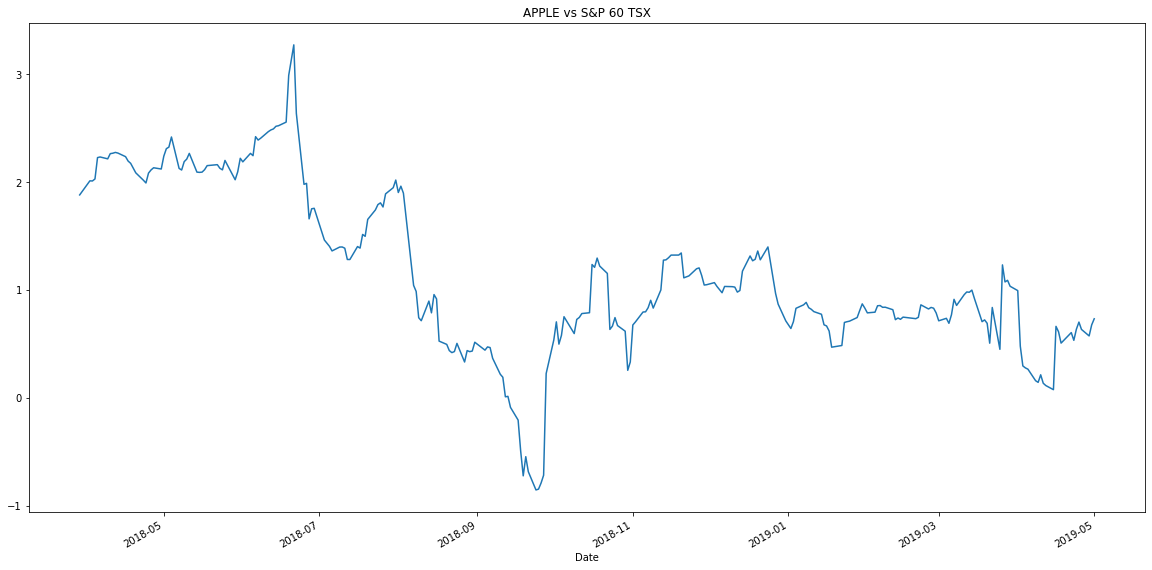

In [63]:
# Calculate and plot Beta
apple_covariance = all_combined_data["APPLE"].cov(all_combined_data["SP&60"])
#calculate 60-day rolling covariance of Algo 1 vs. S&P 60 rolling variance
apple_rolling_covariance =all_combined_data['APPLE'].rolling(window=60).cov(all_combined_data['SP&60'])

# Calculate variance of S&P TSX
sp_variance = all_combined_data["SP&60"].var()
apple_variance = all_combined_data['APPLE'].var()
sp_rolling_variance = all_combined_data['SP&60'].rolling(window=60).var()

# Computing beta
apple_beta = apple_covariance / sp_variance
apple_rolling_beta = apple_rolling_covariance / sp_rolling_variance

# Plot beta trend
apple_rolling_beta.plot(figsize=(20,10), title='APPLE vs S&P 60 TSX')

# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [64]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratios = (all_combined_data.mean() * 252) / (all_combined_data.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ration'}>

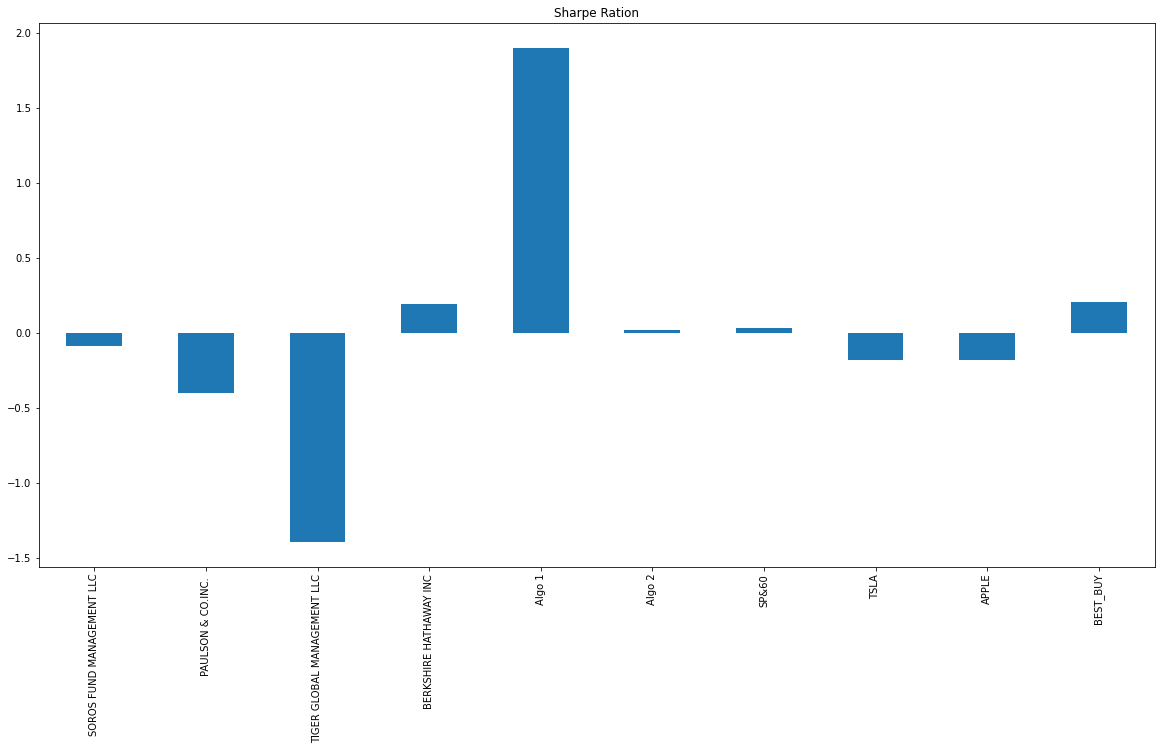

In [65]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind='bar', figsize=(20, 10), title='Sharpe Ration')
#by setting 'kind' to 'bar' we can convert the information into a bar gragh

# How does your portfolio do?
In the custome portfolio we can see that the porfolio as a whole doesn't create enough returns to do perform better than the algo portfolio. A deeper inspection of the portfolios we can see that 'Best Buy' performs the second best out of all the individual stocks. 